<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Data-processing-and-EDA" data-toc-modified-id="Data-processing-and-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data processing and EDA</a></span><ul class="toc-item"><li><span><a href="#Single-Stock-close-up" data-toc-modified-id="Single-Stock-close-up-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single Stock close up</a></span></li><li><span><a href="#2-stocks-Comparison" data-toc-modified-id="2-stocks-Comparison-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2 stocks Comparison</a></span></li></ul></li><li><span><a href="#Strategy-and-signal-generation" data-toc-modified-id="Strategy-and-signal-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Strategy and signal generation</a></span></li><li><span><a href="#Backtesting" data-toc-modified-id="Backtesting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Backtesting</a></span></li><li><span><a href="#Performance" data-toc-modified-id="Performance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Performance</a></span><ul class="toc-item"><li><span><a href="#Sharpe-Ratio" data-toc-modified-id="Sharpe-Ratio-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sharpe Ratio</a></span></li><li><span><a href="#Max-Drawdown" data-toc-modified-id="Max-Drawdown-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Max Drawdown</a></span></li><li><span><a href="#CAGR" data-toc-modified-id="CAGR-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>CAGR</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
import plotly.graph_objs as go

yf.pdr_override()

%matplotlib inline

# Set print options
np.set_printoptions(precision=3)
plt.style.use("ggplot")  # Grammar of Graphics plot style
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

C:\Users\mrche\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\mrche\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Import data

In [2]:
# Define period of interest

start = datetime.date(2019, 1, 1)
end = datetime.date(2024, 1, 1)

In [3]:
# Definte ticker of interest

tickers =\
    ["AAPL",
     "MSFT",
     "NFLX",
     "AMZN",
     "BA",
     "UAL",
     "GS",
     "JPM"]

In [4]:
# From Yahoo Finance

def extract_multiple_stocks(tickers, start, end):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start, end)

    interim = map(
        data, tickers)  #map runs the data function over all iterable Tickers
    return pd.concat(interim, keys=tickers, names=["Tickers", "Dates"])

In [5]:
stocks = extract_multiple_stocks(tickers, start, end)
stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close  \
Tickers Dates                                                        
AAPL    2019-01-02   38.722500   39.712502   38.557499   39.480000   
        2019-01-03   35.994999   36.430000   35.500000   35.547501   
        2019-01-04   36.132500   37.137501   35.950001   37.064999   
        2019-01-07   37.174999   37.207500   36.474998   36.982498   
        2019-01-08   37.389999   37.955002   37.130001   37.687500   
...                        ...         ...         ...         ...   
JPM     2023-12-22  167.500000  168.229996  167.229996  167.399994   
        2023-12-26  167.460007  168.770004  167.179993  168.389999   
        2023-12-27  167.839996  169.470001  167.580002  169.399994   
        2023-12-28  169.350006  170.660004  169.000000  170.300003   
        2023-12-29  170.000000  170.690002  169.630005  170.100006   

                     Adj Close     Volume  
Tickers Dates                              
AAPL    2019-01-02   37.845043  148158800  
        2019-01-03   34.075394  365248800  
        2019-01-04   35.530048  234428400  
        2019-01-07   35.450954  219111200  
        2019-01-08   36.126774  164101200  
...                        ...        ...  
JPM     2023-12-22  166.374069    6574900  
        2023-12-26  167.358017    4683600  
        2023-12-27  168.361816    6428600  
        2023-12-28  169.256317    6320100  
        2023-12-29  169.057541    6431800  

[10064 rows x 6 columns]

In [6]:
# only interested in the Adjusted Close for now
Daily_Closing_Price = stocks[["Adj Close"
                             ]].reset_index().pivot(index="Dates",
                                                    columns="Tickers",
                                                    values="Adj Close")
Daily_Closing_Price

Tickers           AAPL        AMZN          BA          GS         JPM  \
Dates                                                                    
2019-01-02   37.845043   76.956497  314.645142  151.677505   84.811684   
2019-01-03   34.075394   75.014000  302.100525  149.455673   83.606361   
2019-01-04   35.530048   78.769501  317.822571  154.340225   86.688568   
2019-01-07   35.450954   81.475502  318.823425  155.195480   86.748817   
2019-01-08   36.126774   82.829002  330.891937  154.622330   86.585228   
...                ...         ...         ...         ...         ...   
2023-12-22  193.353287  153.419998  260.440002  377.971466  166.374069   
2023-12-26  192.803986  153.410004  262.790009  378.924713  167.358017   
2023-12-27  192.903839  153.339996  262.100006  381.774536  168.361816   
2023-12-28  193.333298  153.380005  260.350006  383.690948  169.256317   
2023-12-29  192.284637  151.940002  260.660004  383.055450  169.057541   

Tickers           MSFT        NFLX        UAL  
Dates                                          
2019-01-02   95.846024  267.660004  84.180000  
2019-01-03   92.320038  271.200012  80.000000  
2019-01-04   96.613777  297.570007  82.680000  
2019-01-07   96.737000  315.339996  83.230003  
2019-01-08   97.438400  320.269989  82.379997  
...                ...         ...        ...  
2023-12-22  373.888580  486.760010  42.549999  
2023-12-26  373.968445  491.190002  42.080002  
2023-12-27  373.379547  491.790009  41.730000  
2023-12-28  374.587280  490.510010  41.970001  
2023-12-29  375.345886  486.880005  41.259998  

[1258 rows x 8 columns]

<AxesSubplot:xlabel='Dates'>

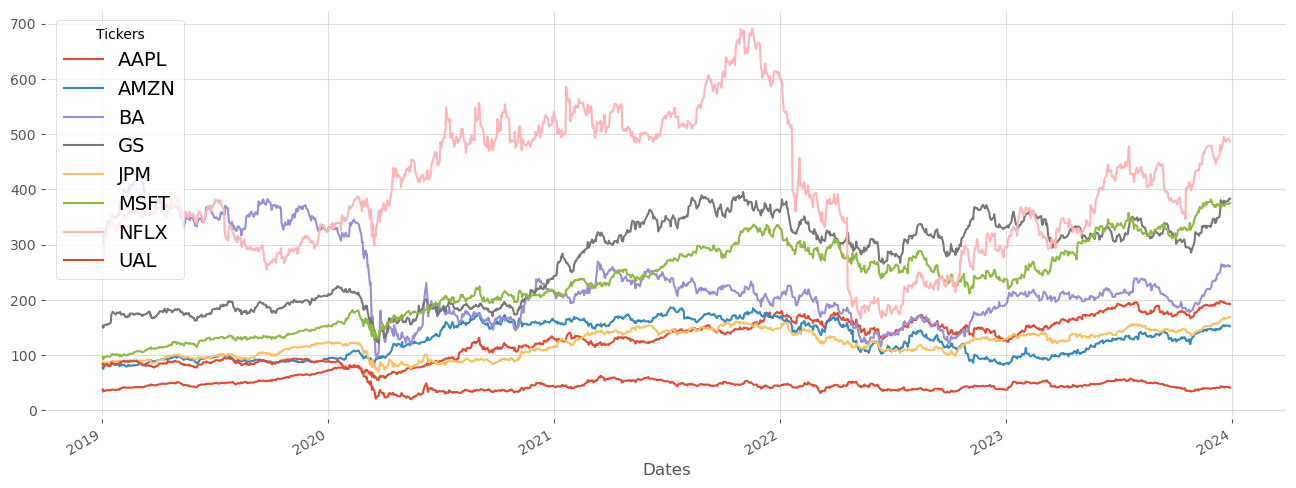

In [7]:
Daily_Closing_Price.plot(figsize=[16, 6])

In [8]:
Daily_Percentage_Change=Daily_Closing_Price.pct_change().fillna(0)
Daily_Percentage_Change

Tickers         AAPL      AMZN        BA        GS       JPM      MSFT  \
Dates                                                                    
2019-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2019-01-03 -0.099607 -0.025241 -0.039869 -0.014648 -0.014212 -0.036788   
2019-01-04  0.042689  0.050064  0.052042  0.032682  0.036866  0.046509   
2019-01-07 -0.002226  0.034353  0.003149  0.005541  0.000695  0.001275   
2019-01-08  0.019064  0.016612  0.037853 -0.003693 -0.001886  0.007251   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -0.005547 -0.002730 -0.006030  0.000210 -0.000597  0.002784   
2023-12-26 -0.002841 -0.000065  0.009023  0.002522  0.005914  0.000214   
2023-12-27  0.000518 -0.000456 -0.002626  0.007521  0.005998 -0.001575   
2023-12-28  0.002226  0.000261 -0.006677  0.005020  0.005313  0.003235   
2023-12-29 -0.005424 -0.009388  0.001191 -0.001656 -0.001174  0.002025   

Tickers         NFLX       UAL  
Dates                           
2019-01-02  0.000000  0.000000  
2019-01-03  0.013226 -0.049656  
2019-01-04  0.097234  0.033500  
2019-01-07  0.059717  0.006652  
2019-01-08  0.015634 -0.010213  
...              ...       ...  
2023-12-22 -0.009865 -0.000705  
2023-12-26  0.009101 -0.011046  
2023-12-27  0.001222 -0.008318  
2023-12-28 -0.002603  0.005751  
2023-12-29 -0.007400 -0.016917  

[1258 rows x 8 columns]

# Data processing and EDA

## Single Stock close up

In [9]:
single_stock=tickers[0]

In [10]:
close_up=stocks.loc[single_stock].reset_index()
close_up

Dates        Open        High         Low       Close   Adj Close  \
0    2019-01-02   38.722500   39.712502   38.557499   39.480000   37.845043   
1    2019-01-03   35.994999   36.430000   35.500000   35.547501   34.075394   
2    2019-01-04   36.132500   37.137501   35.950001   37.064999   35.530048   
3    2019-01-07   37.174999   37.207500   36.474998   36.982498   35.450954   
4    2019-01-08   37.389999   37.955002   37.130001   37.687500   36.126774   
...         ...         ...         ...         ...         ...         ...   
1253 2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
1254 2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
1255 2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
1256 2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
1257 2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

         Volume  
0     148158800  
1     365248800  
2     234428400  
3     219111200  
4     164101200  
...         ...  
1253   37122800  
1254   28919300  
1255   48087700  
1256   34049900  
1257   42628800  

[1258 rows x 7 columns]

<BarContainer object of 1258 artists>

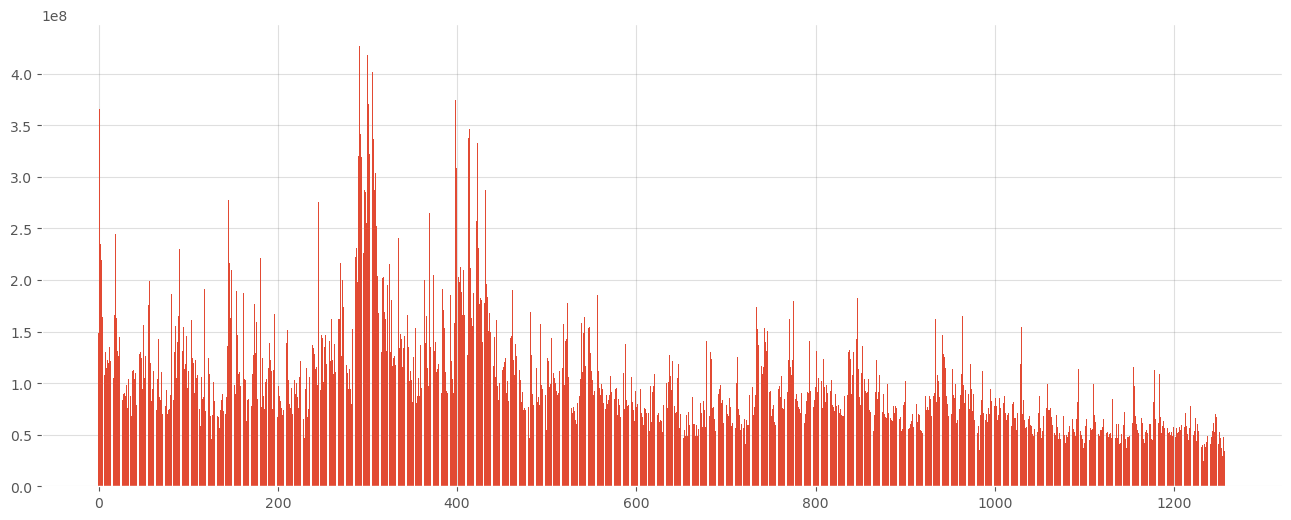

In [11]:
# close_up.Volume
f, ax =plt.subplots(figsize = [16, 6])
plt.bar(close_up.Volume.index,close_up.Volume)

In [12]:
AdjClose = go.Scatter(x=close_up.Dates, 
                      y=close_up["Adj Close"])


In [13]:
go.Figure(AdjClose)

In [14]:
candlestick = [
    go.Candlestick(x=close_up.Dates,
                   open=close_up.Open,
                   high=close_up.High,
                   low=close_up.Low,
                   close=close_up.Close)
]

In [15]:
go.Figure(candlestick)

## 2 stocks Comparison

In [16]:
stock_1 = tickers[0]
compare1 = stocks.loc[stock_1].reset_index()

stock_2 = tickers[1]
compare2 = stocks.loc[stock_2].reset_index()

In [17]:
# COMPARE RETURNS

comparison =\
    [go.Scatter(x = compare1.Dates,
                y = compare1.Close / compare1.iloc[0]["Close"], # compare the returns, not the prices
                name = stock_1
               ),
     go.Scatter(x = compare2.Dates,
                y = compare2.Close / compare2.iloc[0]["Close"],
                name = stock_2)
    ]

In [18]:
updatemenus = list([
    dict(
        active=-1,
        buttons=list([
            dict(label=stock_1,
                 method="update",
                 args=[{
                     "visible": [True, False]
                 }, {
                     "title": stock_1
                 }]),
            dict(label=stock_2,
                 method="update",
                 args=[{
                     "visible": [False, True]
                 }, {
                     "title": stock_2
                 }]),
            dict(label=stock_1 + stock_2,
                 method="update",
                 args=[{
                     "visible": [True, True]
                 }, {
                     "title": f"{stock_1} vs. {stock_2}"
                 }]),
        ]),
    )
])

layout_for_comparison = dict(title="Return Comparison",
                             showlegend=True,
                             updatemenus=updatemenus)

f_for_comparison = dict(data=comparison, layout=layout_for_comparison)

go.Figure(comparison)

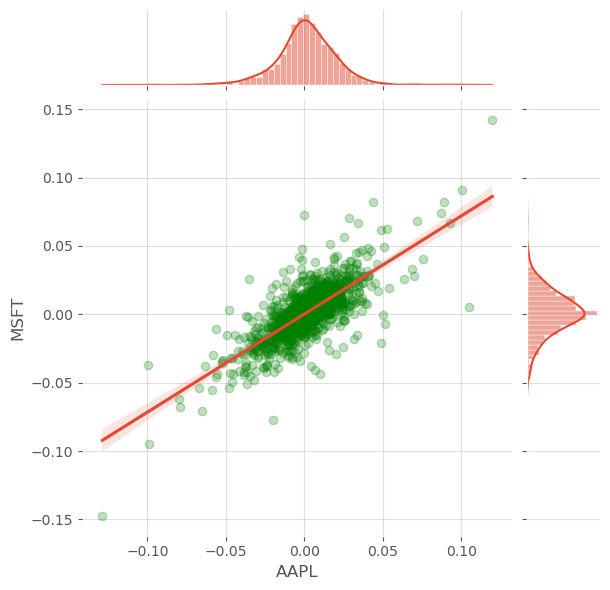

In [19]:
sns.jointplot(
    x=stock_1,
    y=stock_2,
    data=Daily_Percentage_Change,
    kind="reg",
    scatter_kws={
        "color": "green",
        "alpha": 0.25
    }
)

# Strategy and signal generation

In [20]:
# MACD here
short = 12
long = 26
sig = 9


def get_MACD(T):
    T['short_EMA'] = T['Adj Close'].ewm(span=short, min_periods=short).mean()
    T['long_EMA'] = T['Adj Close'].ewm(span=long, min_periods=long).mean()
    T['MACD'] = T['short_EMA'] - T['long_EMA']
    T['sig_line'] = T['MACD'].ewm(span=sig, min_periods=sig).mean()
    T["Positions"] = 0.0
    T["Positions"] = np.where(T['MACD'] > T['sig_line'], 1.0, 0.0)
    T["BUY_or_SELL"] = T["Positions"].diff()
    return T


stocks_dic = {}
for ticker in tickers:
    stocks_dic[ticker] = stocks.loc[ticker]
    get_MACD(stocks_dic[ticker])
stocks_dic

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Dates                                                                    
 2019-01-02   38.722500   39.712502   38.557499   39.480000   37.845043   
 2019-01-03   35.994999   36.430000   35.500000   35.547501   34.075394   
 2019-01-04   36.132500   37.137501   35.950001   37.064999   35.530048   
 2019-01-07   37.174999   37.207500   36.474998   36.982498   35.450954   
 2019-01-08   37.389999   37.955002   37.130001   37.687500   36.126774   
 ...                ...         ...         ...         ...         ...   
 2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
 2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
 2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
 2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
 2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   
 
               

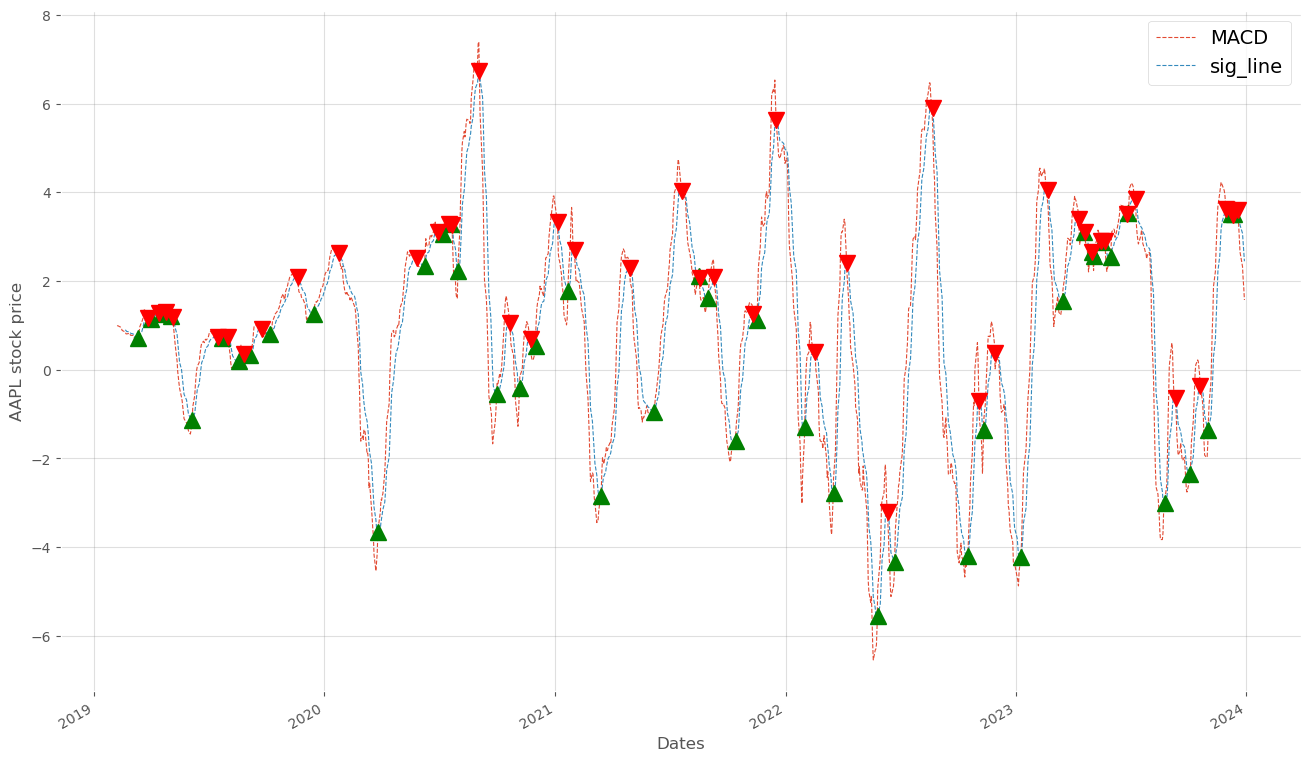

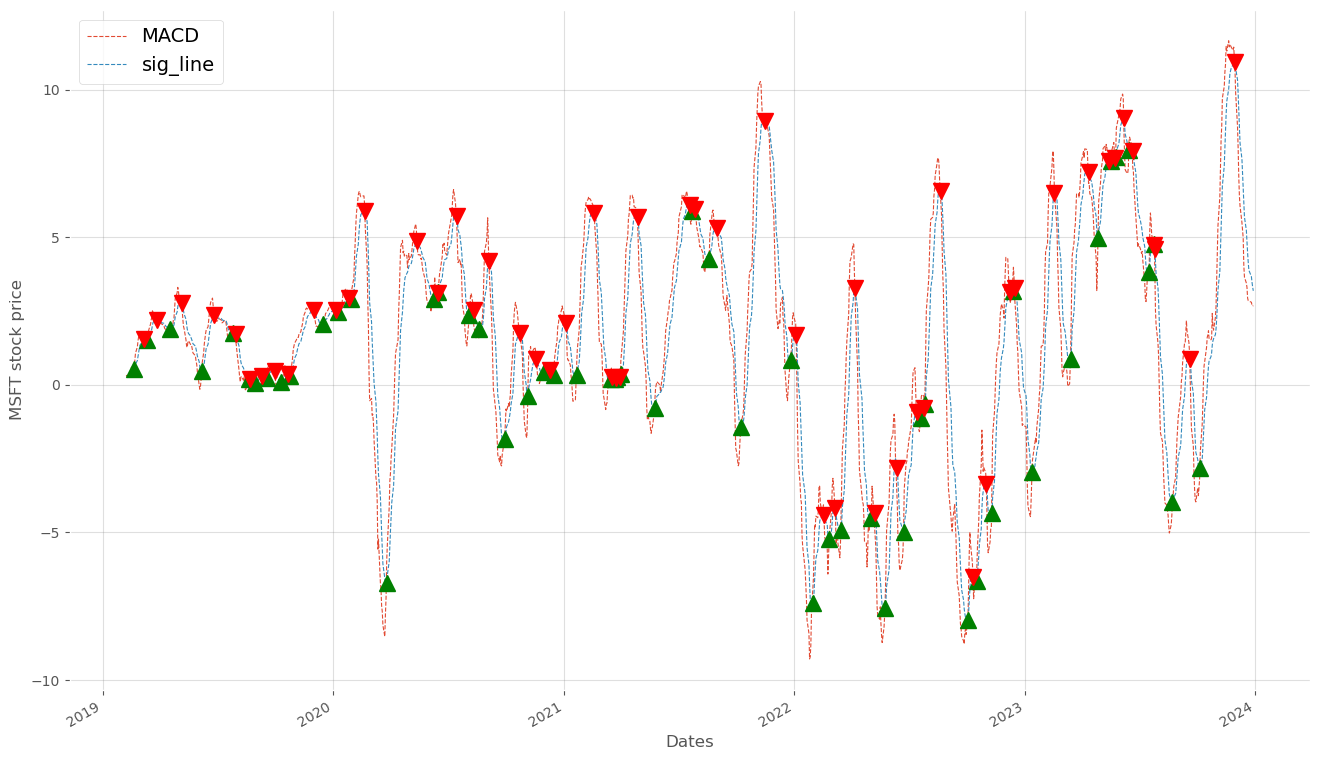

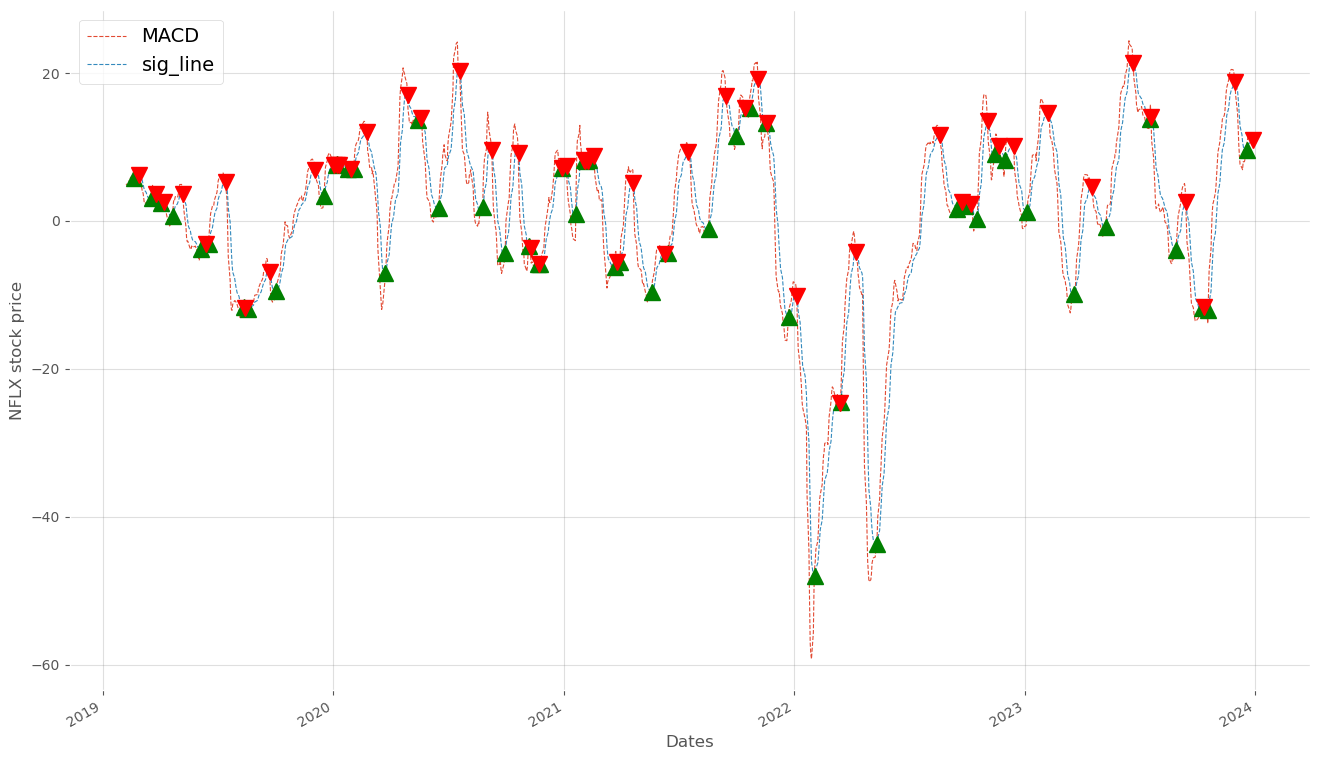

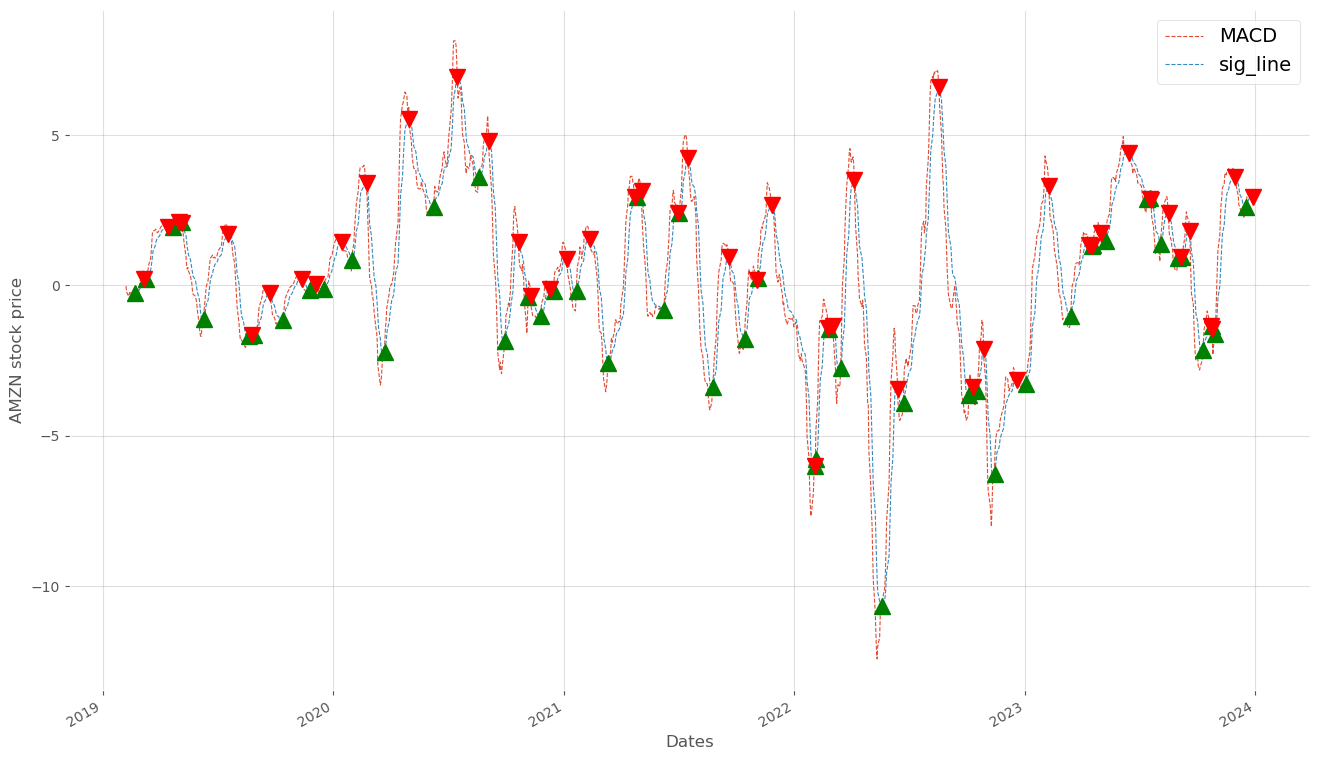

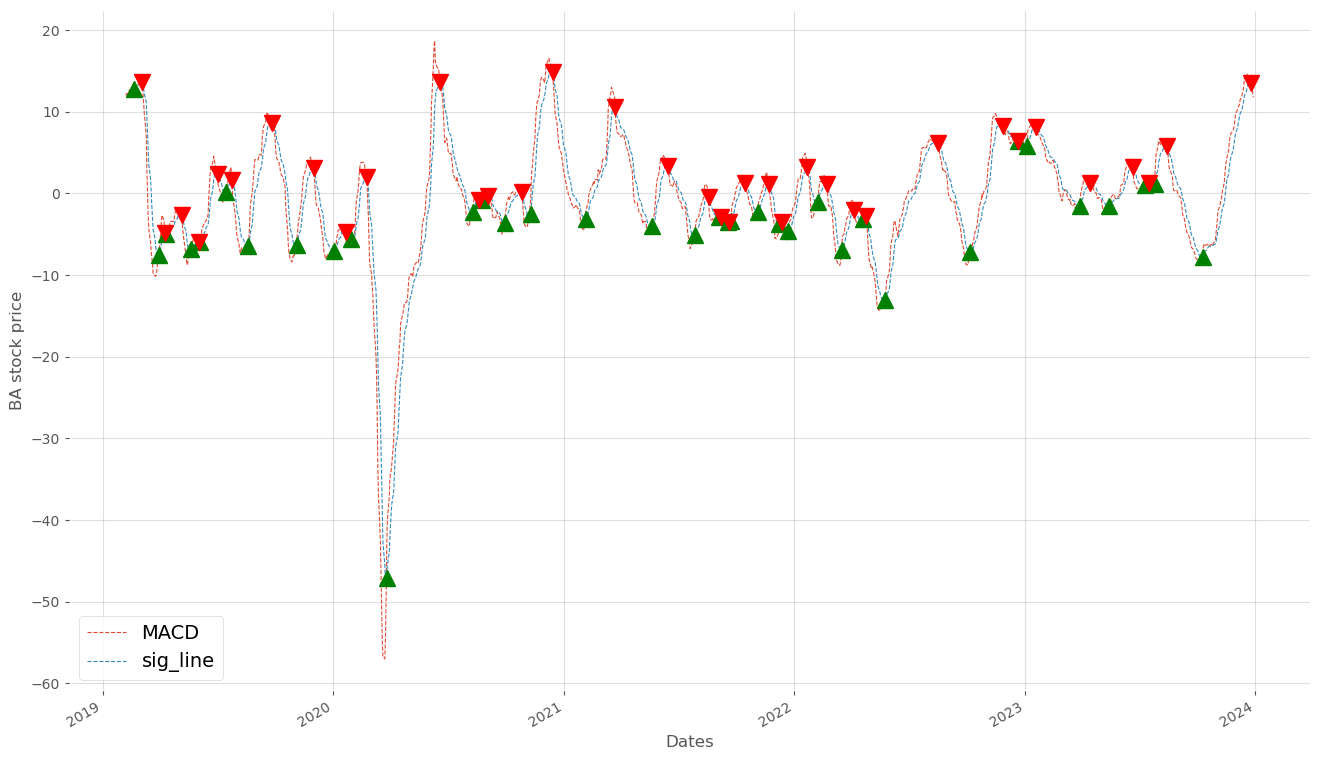

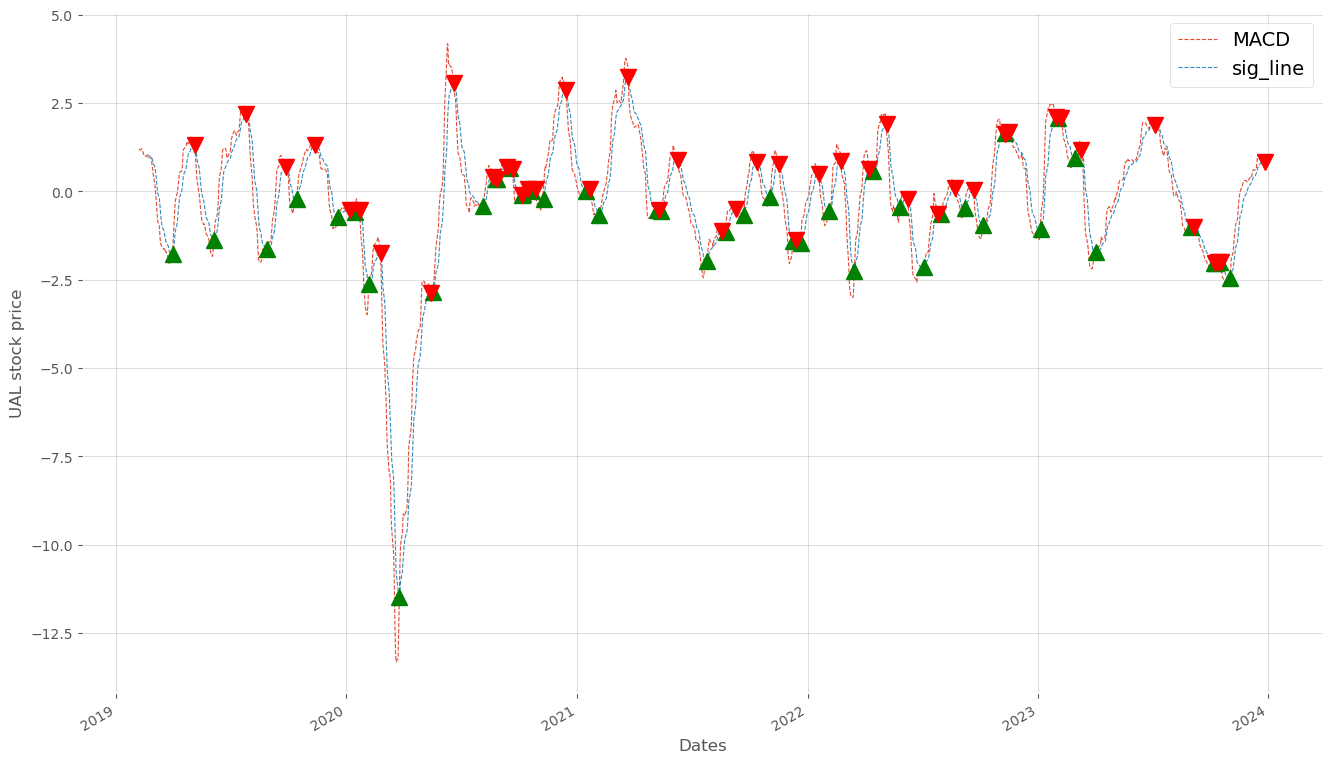

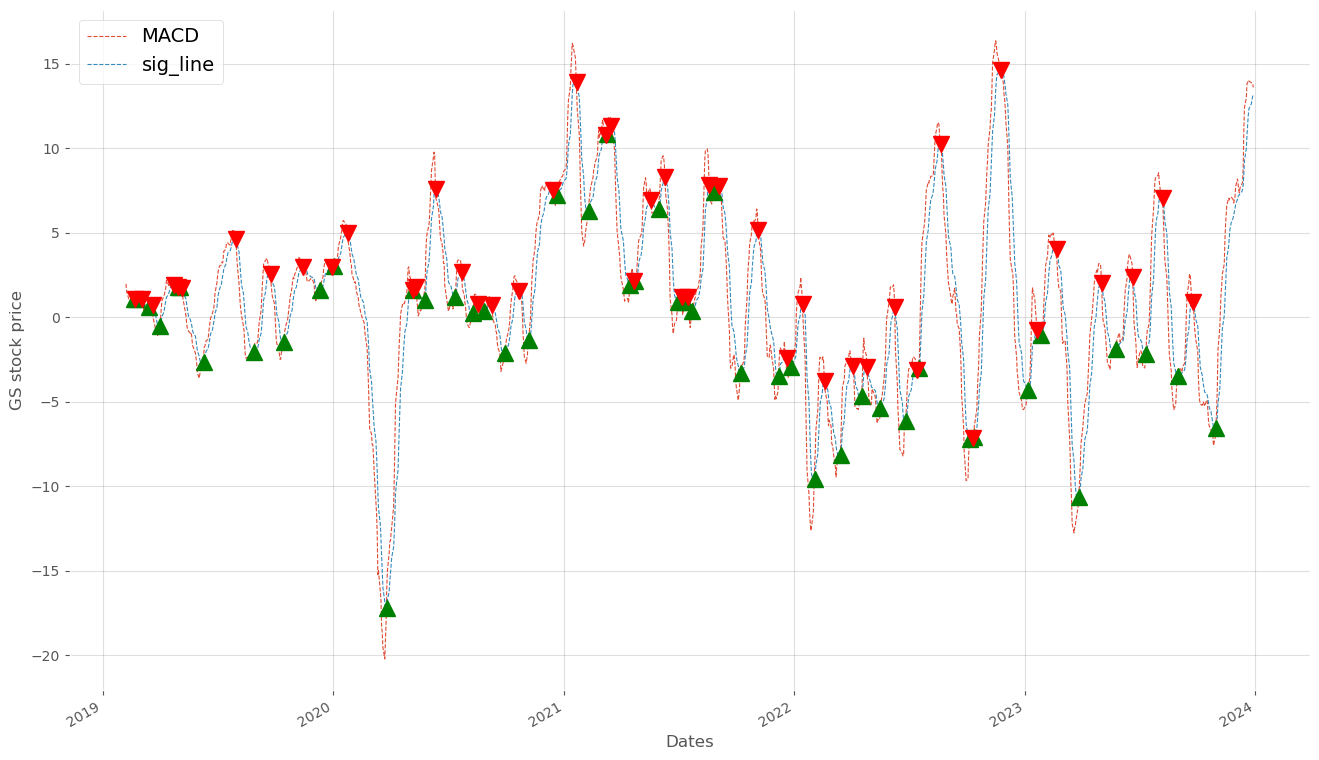

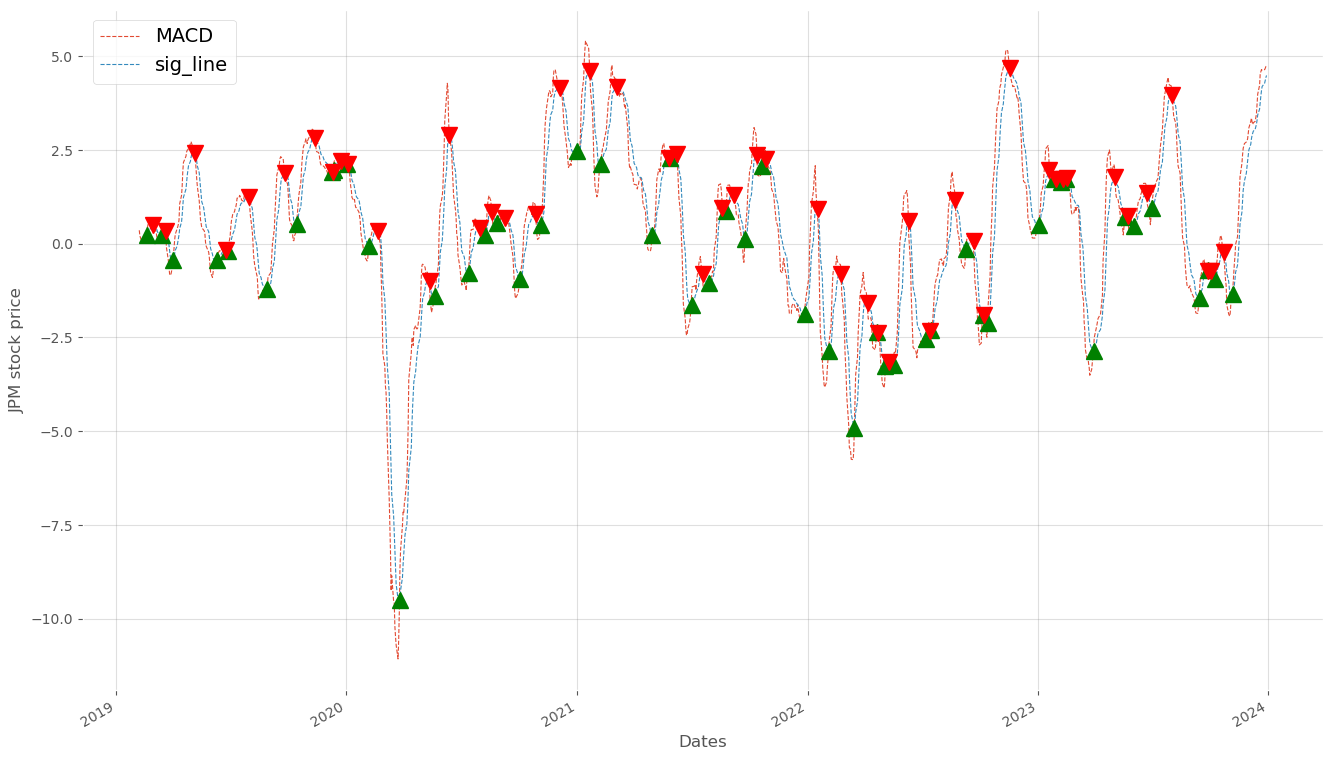

In [21]:
# Visualize MACD
def visualize_macd(T, ticker):
    fig = plt.figure(figsize=[16, 10])
    sub = fig.add_subplot(111, ylabel=f"{ticker} stock price")

    T[["MACD", "sig_line"]].plot(ax=sub, style=["--", "--"], lw=0.80)

    sub.plot(
        T.loc[T.BUY_or_SELL == 1.0].index,
        T.sig_line[T.BUY_or_SELL == 1.0],
        "^",
        color="green",
        markersize=12,
    )

    sub.plot(
        T.loc[T.BUY_or_SELL == -1.0].index,
        T.sig_line[T.BUY_or_SELL == -1.0],
        "v",
        color="red",
        markersize=12,
    )


for ticker in tickers:
    visualize_macd(stocks_dic[ticker], ticker)

# Backtesting

In [22]:
def cumulative_macd(T, initial_capital=1e5):
    first_one_index = T['BUY_or_SELL'].eq(1).idxmax()

    T['Positions'] = np.where(T.index < first_one_index, 0, T['Positions'])
    T['log_returns'] = np.log(T['Adj Close'] / T['Adj Close'].shift(1))
    T['strategy_returns'] = (T['log_returns'] * T['Positions'].shift(1)).apply(
        np.exp)

    T['Commision_fee'] = np.where(T['BUY_or_SELL'] == 0, 0, 5)

    T['cumulative_capital'] = initial_capital

    for i in range(1, len(T)):
        T['cumulative_capital'].iloc[i] = (
            T['strategy_returns'].iloc[i] *
            (T['cumulative_capital'].iloc[i - 1] - T['Commision_fee'].iloc[i]))

    T['cumulative_returns'] = T["cumulative_capital"] / 1e5
    T["max_gross_performance"] =\
(
    T
    ["cumulative_returns"]
    .cummax()
    )
    return T


for ticker in tickers:
    cumulative_data = cumulative_macd(stocks_dic[ticker], initial_capital=1e5)
    last_cumulative_returns = cumulative_data['cumulative_returns'].iloc[-1]
    print(f"Last cumulative returns for {ticker}: {last_cumulative_returns:.3f}")

Last cumulative returns for AAPL: 3.968
Last cumulative returns for MSFT: 1.259
Last cumulative returns for NFLX: 1.058
Last cumulative returns for AMZN: 1.307
Last cumulative returns for BA: 2.023
Last cumulative returns for UAL: 0.951
Last cumulative returns for GS: 2.574
Last cumulative returns for JPM: 1.484


# Performance

## Sharpe Ratio

In [23]:
#annualized Sharpe ratio
def sharpe(T):
    returns = T['cumulative_capital'] / T['cumulative_capital'].shift(1) - 1
    annualized_returns = returns.mean() * 253  
    annualized_volatility = returns.std() * np.sqrt(253)
    sharpe_ratio = annualized_returns / annualized_volatility
    return sharpe_ratio

for ticker in tickers:
    sharpe_ratio = sharpe(stocks_dic[ticker])
    print(f"{ticker}:", "%.3f" %sharpe_ratio)

AAPL: 1.567
MSFT: 0.339
NFLX: 0.182
AMZN: 0.348
BA: 0.589
UAL: 0.173
GS: 1.064
JPM: 0.488


## Max Drawdown

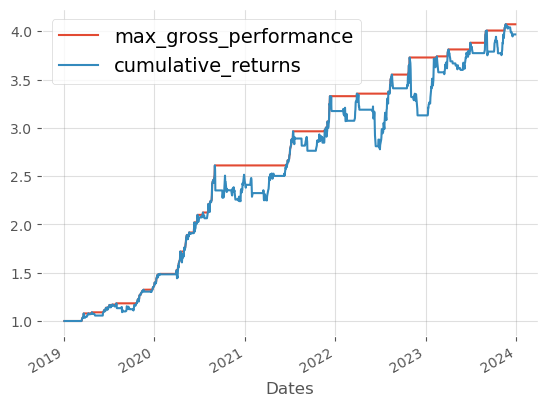

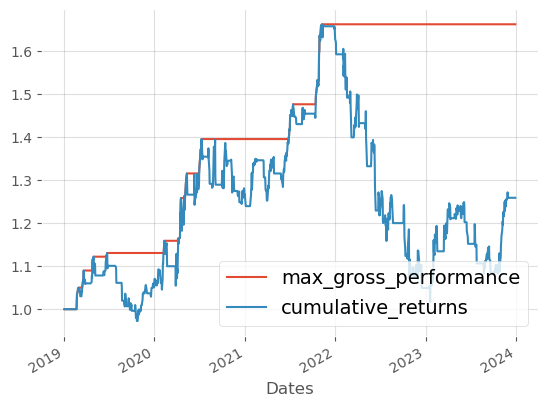

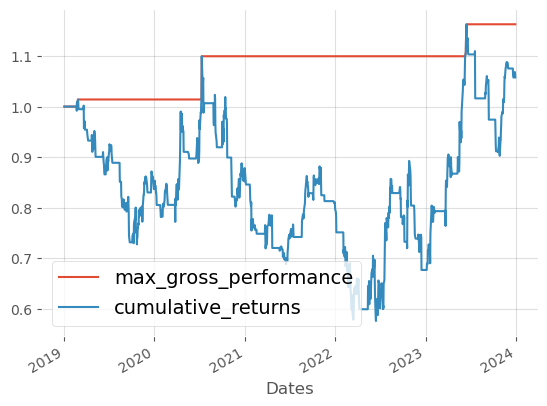

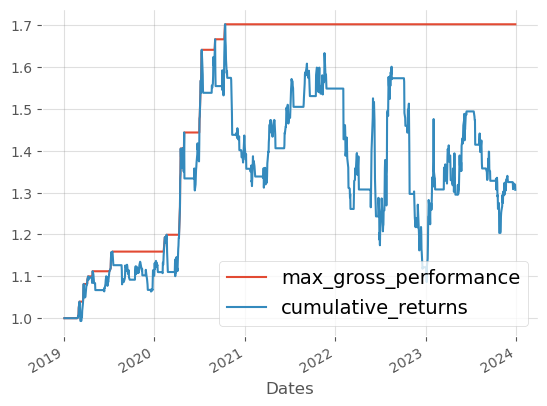

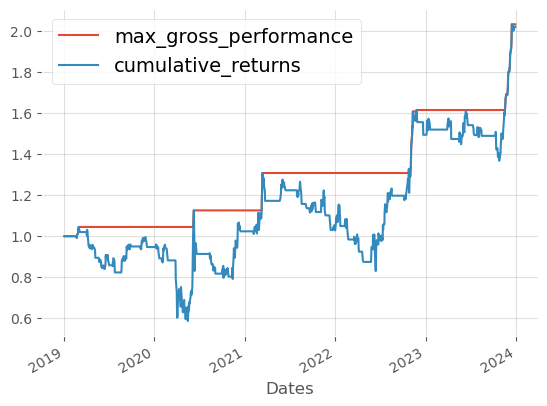

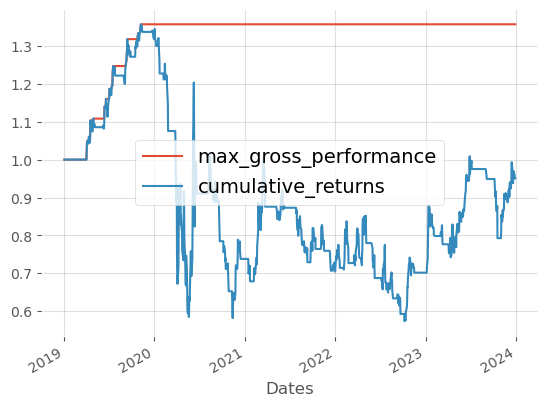

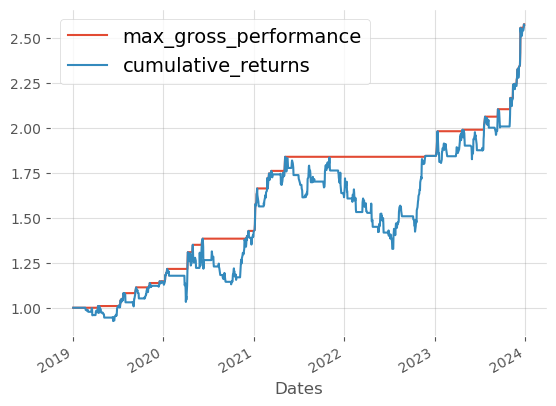

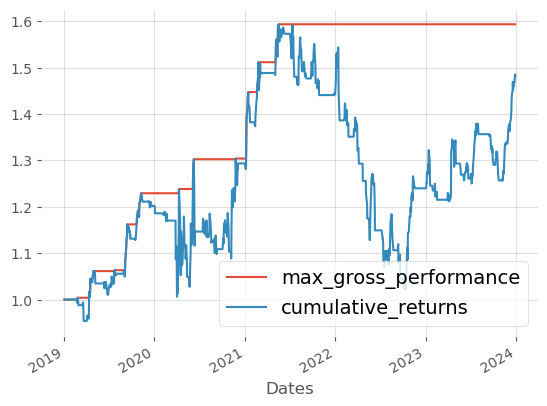

In [24]:
for i in tickers:
    stocks_dic[i][["max_gross_performance", "cumulative_returns"]].plot()

In [25]:
def get_drawdown (T):
    #as output drawdown_df would not have continuous date index, modifications are done to portfolio_df
    #drawdowns are between peaks
    T["new_peak"]=\
        np.where(T["max_gross_performance"]==\
                 T["cumulative_returns"], 1, 0)
    #in case the last day is part of a drawdown, coerce it into a new peak
    T["new_peak"][-1]=1

    # display(T["new_peak"])

    #daily drawdown percentation
    T["dd_percentage"]=\
      (T["max_gross_performance"] - T["cumulative_returns"]) * 100


    #create new drawdown_df where index are dates with new peaks only
    drawdown=pd.DataFrame(index=T[T["new_peak"]==1].index)
    drawdown["start_date"]=drawdown.index
    drawdown["end_date"]=drawdown["start_date"].shift(-1)
    drawdown["max_percentage"]=0.0
    drawdown.dropna(inplace=True)

    #fill drawdown duration
    drawdown["duration"]=drawdown["end_date"]-drawdown["start_date"]
    drawdown.dropna(inplace=True)

    #fill max drawdown percentage based on portfolio_df information
    for i in drawdown.index:
        drawdown.at[i, "max_percentage"]=\
            T.loc[i:drawdown.loc[i, "end_date"], "dd_percentage"].max()

    return drawdown

In [26]:
for ticker in tickers:
    print(ticker, "worst drawdown based on percentage")
    display(get_drawdown(stocks_dic[ticker]).nlargest(3, "max_percentage"))
    print("\n")

AAPL worst drawdown based on percentage


start_date   end_date  max_percentage duration
Dates                                                    
2022-10-28 2022-10-28 2023-02-15       59.954243 110 days
2022-03-29 2022-03-29 2022-08-03       57.643705 127 days
2020-09-01 2020-09-01 2021-06-17       37.082734 289 days



MSFT worst drawdown based on percentage


start_date   end_date  max_percentage duration
Dates                                                    
2021-11-08 2021-11-08 2023-12-29       64.523237 781 days
2019-06-24 2019-06-24 2020-02-10       15.818522 231 days
2020-07-09 2020-07-09 2021-06-28       15.599529 354 days



NFLX worst drawdown based on percentage


start_date   end_date  max_percentage  duration
Dates                                                     
2020-07-10 2020-07-10 2023-06-12       52.356559 1067 days
2019-02-26 2019-02-26 2020-07-09       28.648724  499 days
2023-06-15 2023-06-15 2023-12-29       26.000966  197 days



AMZN worst drawdown based on percentage


start_date   end_date  max_percentage  duration
Dates                                                     
2020-10-13 2020-10-13 2023-12-29       61.561660 1172 days
2020-04-30 2020-04-30 2020-07-01       13.839556   62 days
2020-09-02 2020-09-02 2020-10-12       13.402947   40 days



BA worst drawdown based on percentage


start_date   end_date  max_percentage duration
Dates                                                    
2021-03-12 2021-03-12 2022-10-25       47.843148 592 days
2019-03-01 2019-03-01 2020-06-08       45.899095 465 days
2020-06-08 2020-06-08 2021-03-10       33.451116 275 days



UAL worst drawdown based on percentage


start_date   end_date  max_percentage  duration
Dates                                                     
2019-11-07 2019-11-07 2023-12-29       78.203242 1513 days
2019-07-18 2019-07-18 2019-09-09        4.742983   53 days
2019-06-19 2019-06-19 2019-07-02        4.710104   13 days



GS worst drawdown based on percentage


start_date   end_date  max_percentage duration
Dates                                                    
2021-05-07 2021-05-07 2022-11-25       51.248405 567 days
2020-06-08 2020-06-08 2020-12-02       25.410465 177 days
2020-01-16 2020-01-16 2020-04-08       18.375496  83 days



JPM worst drawdown based on percentage


start_date   end_date  max_percentage duration
Dates                                                    
2021-05-17 2021-05-17 2023-12-29       57.042862 956 days
2019-11-08 2019-11-08 2020-04-09       22.315173 153 days
2020-06-08 2020-06-08 2020-11-24       21.387641 169 days

## CAGR

In [27]:
days =(stocks_dic[tickers[0]].index[-1] - stocks_dic[tickers[0]].index[0]).days

days

1822

In [28]:
for ticker in tickers:
#     print(ticker, stocks_dic[ticker])
    CAGR = (((stocks_dic[ticker]["Adj Close"][-1]) / (stocks_dic[ticker]["Adj Close"][0]))**(365.0 / days)) - 1
    print(f"{ticker}'s CAGR='", "%.3f" %CAGR)

AAPL's CAGR=' 0.385
MSFT's CAGR=' 0.315
NFLX's CAGR=' 0.127
AMZN's CAGR=' 0.146
BA's CAGR=' -0.037
UAL's CAGR=' -0.133
GS's CAGR=' 0.204
JPM's CAGR=' 0.148
